# <h1><center>Gravitational-Wave Explorer: A Beginner's Guide–Notebook 2 </center><h1>


#Notebook 2 of 3

Authors: Bradlee Tejeda$^{1}$, Rachel Langgin$^{2}$

$^{1}$Las Vegas Academy of the Arts \

$^{2}$University of Nevada, Las Vegas

**Goal of Notebook 2**: In Notebook 1, we built the groundwork—explaining the dense objects (like black holes) that generate gravitational waves, and the spacetime they travel through.

Now, we shift gears.

This notebook introduces the real-world tools that allow scientists to detect and interpret those ripples in spacetime. We’ll explore:

	•	**Gravitational-wave detectors** (like LIGO and Virgo): how they measure spacetime distortions
	•	**Accessing open data** from actual gravitational-wave events
	•	**Generating waveforms** to simulate the signals of colliding black holes

Let’s begin by importing the coding libraries we’ll need. Read through the comments to understand what each package does and how it fits into our analysis toolkit.

⚠️ Warning: restart the runtime after running the cell below. ⚠️

To do so, click "Runtime" in the menu and choose "Restart and run all".

#Part 1: GW Detectors

In [ ]:
# === Plotting ===
import matplotlib.pyplot as plt  # Import the popular plotting library for creating graphs and visualizations.
from PIL import Image as PILImage # Import PIL's Image class for image processing tasks (renamed to avoid conflicts).

# === Colab utilities ===
import os  # Provides a way to use operating system functionality like file paths.
import numpy as np  # Fundamental package for numerical computations, especially arrays and matrices.
from google.colab import files, drive  # Colab helpers to upload/download files and mount Google Drive.

# -- For Google Colab
!pip install --quiet "gwpy==3.0.12" "astropy==5.3.4" matplotlib==3.7.3 gwosc # Installs specific versions of gravitational wave analysis packages in the notebook environment.

## Section 1: Gravitational Wave (GW) Detectors

## GW Detectors Around the World

The image below shows the current and planned locations of gravitational wave detectors around the world. These observatories work together to detect and verify the incredibly faint ripples in spacetime caused by massive events in the universe. Below are descriptions of the major GW detectors:

- **LIGO Hanford (Washington, USA)**: One of the two LIGO observatories in the United States. It played a key role in the first direct detection of gravitational waves (GW150914).
- **LIGO Livingston (Louisiana, USA)**: The second LIGO site in the U.S., which works in tandem with Hanford for improved accuracy and signal triangulation.
- **Virgo (Pisa, Italy)**: A European interferometer that joined LIGO in 2017. It helped with the localization of events like GW170817.
- **KAGRA (Kamioka Mine, Japan)**: The first GW detector built underground and cooled to cryogenic temperatures, improving sensitivity to faint signals.
- **GEO600 (Hanover, Germany)**: A smaller detector used primarily for testing new technologies that will be used in larger detectors.
- **LIGO India (under construction)**: Planned to further increase the global network’s ability to localize GW events by adding another geographically distant detector.

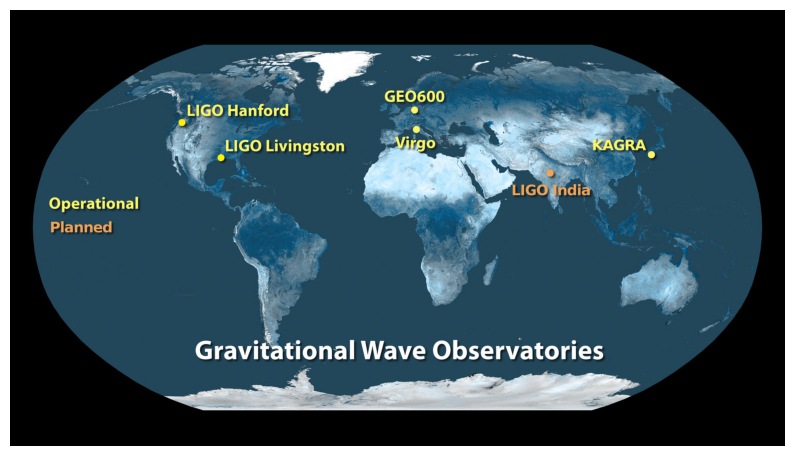

In [ ]:
import requests  # For sending HTTP requests to get the image from the web.
from io import BytesIO  # For handling byte streams, letting us open images from downloaded content.

# Load the image directly from the URL
url = "https://www.ligo.caltech.edu/system/avm_image_sqls/binaries/136/huge/GW_Detector_Map_v5.jpg?1608063350"  # Link to the GW detector map image.
response = requests.get(url)  # Make an HTTP GET request to fetch the image data.
img = PILImage.open(BytesIO(response.content))  # Open the image using PIL from the downloaded byte content.

# Display the image
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes with specified size for better visibility.
ax.imshow(img)  # Show the image on the axes.
ax.axis('off')  # Hide the axis ticks and labels for a cleaner look.
plt.show()  # Render the image in the output cell.

#Gravitational Wave Detectors – Summary

###LIGO Hanford (Washington, USA)
*   One of the two original LIGO observatories, with **4 km-long vacuum arms**.
*	Detected the first gravitational wave: **GW150914**, from a black hole merger over a billion light-years away.
*	Works in coordination with **LIGO Livingston** to confirm signals and eliminate false positives.

###LIGO Livingston (Louisiana, USA)
*		Twin detector to Hanford, located in the **forests of Louisiana**.
*		Key for verifying detections and **triangulating gravitational wave sources**.
*		Has confirmed every major gravitational wave event to date.

###Virgo (Cascina, Italy)
*		Europe’s flagship detector with **3 km arms**, located near Pisa.
*		Joined the LIGO network in 2017, enabling the detection of **GW170817** (a neutron star merger).
*		Played a major role in the rise of **multi-messenger astronomy**.

###KAGRA (Kamioka, Japan)
*		Built **underground** in the Kamioka Mine to reduce seismic interference.
*		World’s first **cryogenic interferometer**, with mirrors cooled near absolute zero.
*	Adds sensitivity and geographic coverage to the global GW network.

###GEO600 (Hanover, Germany)
*		Compact **600-meter detector** focused on technological innovation.
*		Pioneered tools like **squeezed light** to improve measurement precision.
*		Serves as a critical testbed for techniques later used in LIGO and Virgo.

###LIGO India (Maharashtra, India – Under Construction)
*		Future observatory that will expand the global detection network.
*		**Improves triangulation accuracy** for locating GW sources.
*		A major step toward international collaboration in gravitational wave astrophysics.

##Section 2: Key Observations – Binary Black Holes vs. Neutron Star Mergers

Now let’s explain the difference between the two major types of sources we’ve observed:

## What Have We Observed?

Since 2015, gravitational wave detectors have observed dozens of **compact binary coalescences (CBCs)** — mergers of two massive, dense objects. These fall into two major types:

### Binary Black Hole (BBH) Mergers
- First observed event: **GW150914**
- Two black holes spiraled into each other, creating a powerful burst of GWs.
- No electromagnetic signal (light) was observed, because black holes do not emit light.

### Binary Neutron Star (BNS) Mergers
- First observed event: **GW170817**
- Two neutron stars collided.
- This event was **multi-messenger**, detected both in GWs and light (gamma rays, visible light, radio waves).
- Helped confirm that these events create heavy elements like gold and platinum.

### Black Hole Neutron Star (BHNS) Mergers
- First observed events: GW200105 and GW200115
- A black hole merged with a neutron star, producing gravitational waves.
- Unlike BNS mergers, no electromagnetic counterpart was seen — the neutron stars were likely consumed entirely before disruption.
- These detections confirmed that BHNS systems exist in nature, bridging the gap between BBH and BNS populations.

These observations highlight the different types of cosmic collisions we can "listen" to using gravitational waves.


In [ ]:
from IPython.display import display, HTML, Image as IPyImage, Markdown  # Imports for rich display in notebooks: allows showing Markdown, HTML, images.
from matplotlib.widgets import Slider  # Import for creating sliders in matplotlib (optional here but good for 2D/3D plots with sliders).
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting support in matplotlib.

# === Jupyter/Colab UI ===
import ipywidgets as widgets  # Widgets for interactive controls like sliders, dropdowns, buttons.
from ipywidgets import interact  # Easy function for making simple interactive UIs.

# ---------------------------------------------------------------
# Event details dictionary
# ---------------------------------------------------------------
# This dictionary stores information about gravitational-wave events.
# Each event has a short description in Markdown and a URL to an illustrative image.
cbc_events = {
    "GW150914": {
        "desc": (
            "**GW150914**\n\n"
            "First-ever detection of gravitational waves on September 14, 2015. "
            "Two black holes (36 and 29 solar masses) merged about 1.3 billion light-years away. "
            "This event confirmed a major prediction of Einstein’s general theory of relativity and "
            "opened an unprecedented new window onto the cosmos."
        ),
        "img_url": "https://journals.aps.org/prl/article/10.1103/PhysRevLett.116.061102/figures/2/medium"  # Link to an event image (spectrogram).
    },
    "GW170817": {
        "desc": (
            "**GW170817**\n\n"
            "Detected on August 17, 2017. First neutron star merger ever observed in both gravitational waves and light! "
            "This event helped scientists trace the origin of heavy elements like gold and platinum. "
            "It marked the beginning of multi-messenger astronomy. More info can be found on https://ligo.org/detections/gw170817/."
        ),
        "img_url": "https://upload.wikimedia.org/wikipedia/commons/a/a0/GW170817_spectrograms.svg"  # Cleaned spectrogram for GW170817.
    }
}

# ---------------------------------------------------------------
# Interactive function
# ---------------------------------------------------------------
# This function takes an event name (e.g., "GW150914"), then:
# - Displays its Markdown-formatted description.
# - Loads and shows the associated image from its URL.
def show_cbc_info(event):
    display(Markdown(cbc_events[event]['desc']))  # Display the event description with bold titles and line breaks.
    display(IPyImage(url=cbc_events[event]["img_url"], width=500))  # Display the event image at a fixed width.

# ---------------------------------------------------------------
# Interact widget
# ---------------------------------------------------------------
# This line creates an interactive dropdown widget automatically,
# letting the user select which event to display.
# When the selection changes, show_cbc_info runs automatically to update the output.
interact(show_cbc_info, event=list(cbc_events.keys()));

interactive(children=(Dropdown(description='event', options=('GW150914', 'GW170817'), value='GW150914'), Outpu…

In [ ]:
from IPython.display import Audio  # Imports for displaying audio players

# ===========================
# Gravitational Wave Audio Clips with Explanations
# ===========================
# This dictionary stores metadata about different gravitational wave audio clips.
# Each key is an event+detector name (e.g., "GW150914_H1").
# Each entry includes:
#  - 'url': link to the processed audio file
#  - 'desc': a Markdown-formatted description for educational context
gw_audio_clips = {
    "GW150914_H1": {
        "url": "https://raw.githubusercontent.com/ii-vnx/gw-audio-clips/main/GW150914_H1.wav",
        "desc": (
            "## GW150914 - Hanford Detector (H1)\n"
            "**Recorded at:** LIGO Hanford Observatory, Washington, USA\n\n"
            "This is real detector data for the first-ever directly detected gravitational wave event on **September 14, 2015**. "
            "The two black holes spiraled into each other over 1.3 billion light-years away. "
            "The data has been adjusted so human ears can hear the 'chirp' as the black holes merge."
        )
    },

    "GW150914_L1": {
        "url": "https://raw.githubusercontent.com/ii-vnx/gw-audio-clips/main/GW150914_L1.wav",
        "desc": (
            "## GW150914 - Livingston Detector (L1)\n"
            "**Recorded at:** LIGO Livingston Observatory, Louisiana, USA\n\n"
            "This is the Livingston detector’s version of the GW150914 signal. "
            "The data has been adjusted so human ears can hear the 'chirp' as the black holes merge."
            "Comparing Hanford and Livingston data helps confirm the event and triangulate its source."
        )
    },

    "GW170817_H1": {
        "url": "https://raw.githubusercontent.com/ii-vnx/gw-audio-clips/main/GW170817_H1.wav",
        "desc": (
            "## GW170817 - Hanford Detector (H1)\n"
            "**Recorded at:** LIGO Hanford Observatory, Washington, USA\n\n"
            "Detected on **August 17, 2017**, this was the first neutron star merger ever observed in both gravitational waves **and** light (gamma rays, visible light, etc.). "
            "The data has been adjusted so human ears can hear the 'chirp' as the black holes merge."
            "It represents the moment when two neutron stars collided, creating heavy elements like gold and platinum."
        )
    },

    "GW170817_L1": {
        "url": "https://raw.githubusercontent.com/ii-vnx/gw-audio-clips/main/GW170817_L1.wav",
        "desc": (
            "## GW170817 - Livingston Detector (L1)\n"
            "**Recorded at:** LIGO Livingston Observatory, Louisiana, USA\n\n"
            "This is the same event (GW170817) as seen by Livingston. "
            "The data has been adjusted so human ears can hear the 'chirp' as the black holes merge."
            "Multiple detectors ensure we can confidently identify the signal and localize the source."
        )
    },

    "GW170817_V1": {
        "url": "https://raw.githubusercontent.com/ii-vnx/gw-audio-clips/main/GW170817_V1.wav",
        "desc": (
            "## GW170817 - Virgo Detector (V1)\n"
            "**Recorded at:** Virgo Observatory, Pisa, Italy\n\n"
            "Virgo joined the global network in 2017, just in time to observe GW170817. "
            "This clip is real adjusted Virgo detector data of the neutron star merger. "
            "Including Virgo improved localization dramatically, proving the power of a global gravitational wave detector network."
        )
    },
}

# ---------------------------------------------------------------
# Dropdown widget
# ---------------------------------------------------------------
# Here we create an interactive dropdown using ipywidgets.Dropdown.
# The dropdown shows the title of each clip for students to choose from.
# It uses a list of tuples: (Display Label, Key in gw_audio_clips)
# This makes the UI friendly while keeping the backend references consistent.
dropdown = widgets.Dropdown(
    options=[(value["desc"].split('\n')[0][3:], key) for key, value in gw_audio_clips.items()],
    description='Choose a Recording:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='70%')
)

# ---------------------------------------------------------------
# Display function
# ---------------------------------------------------------------
# This function is called when the user picks an item from the dropdown.
# It does two things:
#  - Displays the Markdown description with rich formatting
#  - Embeds and plays the audio clip directly in the notebook
def play_audio(selection):
    clip = gw_audio_clips[selection]
    display(Markdown(clip['desc']))  # Show the event's educational description
    display(Audio(url=clip['url']))  # Render the audio player so students can listen

# ---------------------------------------------------------------
# Interact
# ---------------------------------------------------------------
# Finally, we use widgets.interact to bind our play_audio function to the dropdown.
# When students choose a recording from the dropdown, play_audio runs automatically.
# This turns the notebook into an interactive audio exploration tool!
widgets.interact(play_audio, selection=dropdown);

interactive(children=(Dropdown(description='Choose a Recording:', layout=Layout(width='70%'), options=(('GW150…

##Section 3: Next-Generation Detectors (XG)

## Next-Generation GW Detectors

### Einstein Telescope (ET)
- A planned underground observatory in Europe.
- Will have a triangular shape and be more sensitive than current detectors.
- Expected to detect fainter and more distant events, even from the early universe.

![Einstein Telescope](https://www.aei.mpg.de/535047/original-1740491299.webp?t=eyJ3aWR0aCI6OTYwLCJmaWxlX2V4dGVuc2lvbiI6IndlYnAiLCJvYmpfaWQiOjUzNTA0N30%3D--dc4b3de4fa8a6220887b8faeda672285208676c8)

### Cosmic Explorer (CE)
- Proposed next-gen U.S. detector.
- Much longer arms than LIGO (~40 km vs. 4 km).
- Will increase sensitivity by a factor of 10, allowing us to see farther back in cosmic history.

![Cosmic Explorer](https://news.syr.edu/wp-content/uploads/2021/11/Cosmic-400x300-1.jpg)

### Next-Gen Visible Universe Figure

- Next-generation gravitational wave detectors will expand how far into the universe we can observe.  
- We may detect signals from the first seconds after the Big Bang.  
- The figure below illustrates major cosmic milestones and how far these detectors could let us “hear.”

![Next-Gen Visible Universe](https://upload.wikimedia.org/wikipedia/commons/9/9e/Schematic_diagram_of_the_history_of_the_Universe.jpg)



---



# Part 2: How Does LIGO Detect a Gravitational Wave in Real Time?

LIGO works by measuring the tiniest changes in distance — thousands of times smaller than a proton — using laser interferometry. When a gravitational wave passes through Earth, it stretches space in one direction and compresses it in another, causing one arm of LIGO to grow slightly while the other shrinks. This change creates an interference pattern in the laser light, letting us “see” the ripple from events like black hole or neutron star mergers in real time.

Thanks to its global network and advanced computing pipelines, LIGO can detect and announce a GW event within seconds, often triggering telescope follow-ups worldwide.

> Watch the animation below to see how LIGO’s interferometers detect these tiny distortions in real space (*Image credit: LIGO/T. Pyle*):

In [2]:
from IPython.display import display, HTML

display(HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/tQ_teIUb3tE?si=rTnDyFoJ2UMnDAEb" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>'))


/usr/local/lib/python3.12/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#What is Strain?

Strain is the change of relative separation of the test particles in the arms of the detectors, over their original undisturbed distance:

<center>h = $\frac{\Delta L}{L}$</center>

Where:

*   $\Delta L$ is the change in length caused by the GW,
*   L is the original length of the interferometer arm.

The detection of this fractional change allows to observe GWs. Strain is usually incredibly small (on the order of $10^{-21}$) — but detectable thanks to LIGO’s sensitivity.

#What is Chirp Mass?

The chirp mass ($\mathcal{M}$) is a special combination of the two merging objects’ masses. It determines how the frequency of the GW “chirp” rises as the objects spiral inward. It’s given by:

<center>$\mathcal{M} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$</center>

This value controls how fast the wave’s pitch increases — just like the rising tone of a bird’s chirp.

Fetched 1 URLs from gwosc.org for [1187008867 .. 1187008897))
Reading data... [Done]


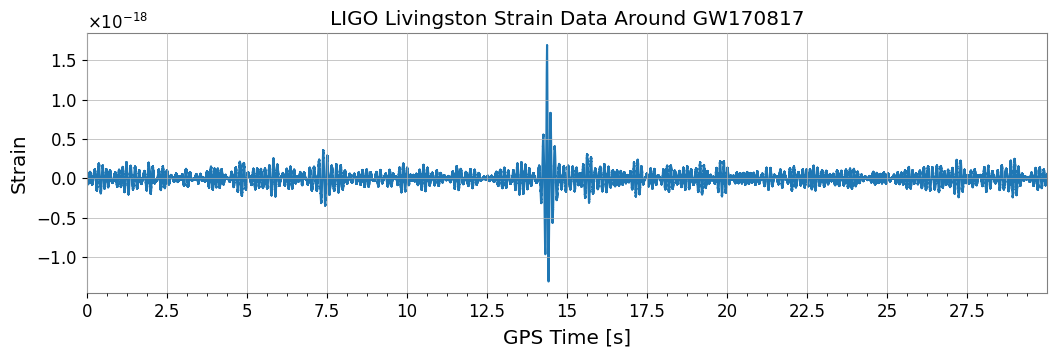

<Figure size 1000x500 with 0 Axes>

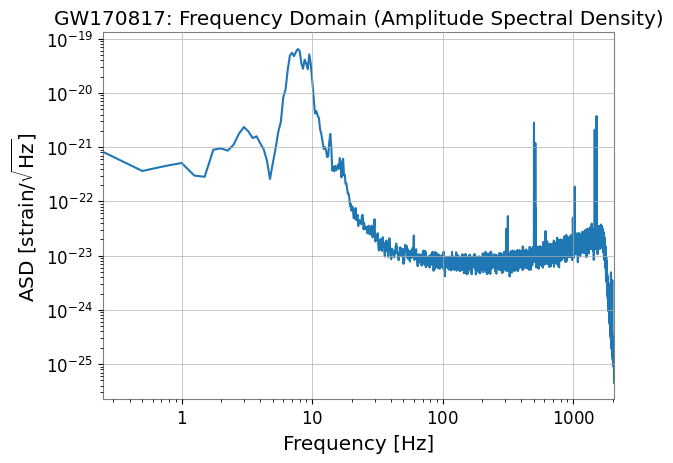

In [ ]:

# Import the function that retrieves the GPS timestamp of a specific gravitational wave event
from gwosc.datasets import event_gps

# Import TimeSeries from GWPy to fetch and manipulate gravitational wave strain data
from gwpy.timeseries import TimeSeries

#### Plot from Notebook 2 is posted here:

# Enable inline plotting so that graphs display directly below each code cell
%matplotlib inline

# Get the GPS time (in seconds) of the GW170817 event (a neutron star merger)
gps_time = event_gps("GW170817")

# Define the time window: 15 seconds before and 15 seconds after the event
start = int(gps_time) - 15
end = int(gps_time) + 15

# Fetch the open strain data from the LIGO Livingston detector (L1) during the defined time window
# 'verbose=True' allows us to see download status and diagnostic output
hdata = TimeSeries.fetch_open_data("L1", start, end, verbose=True)

# Plot the strain data as a function of time
hdata.plot()

# Add a title to the time-domain plot
plt.title("LIGO Livingston Strain Data Around GW170817")

# Label the x-axis as GPS time (in seconds)
plt.xlabel("GPS Time [s]")

# Label the y-axis as strain (dimensionless quantity)
plt.ylabel("Strain")

# Add a grid to the plot to make it easier to read
plt.grid(True)

# Display the time-domain plot
plt.show()

# Compute the Amplitude Spectral Density (ASD) from the strain data
# This shows the signal strength as a function of frequency
asd = hdata.asd(fftlength=4)  # Use a 4-second FFT length to average over the data

# Create a new figure for the frequency-domain (ASD) plot
plt.figure(figsize=(10, 5))

# Plot the ASD curve
asd.plot()

# Add a title to the ASD plot
plt.title("GW170817: Frequency Domain (Amplitude Spectral Density)")

# Label the x-axis as frequency in hertz (Hz)
plt.xlabel("Frequency [Hz]")

# Label the y-axis as ASD in strain per root hertz
plt.ylabel(r"ASD [strain/$\sqrt{\mathrm{Hz}}$]")

# Add a grid to help interpret the frequency plot
plt.grid(True)

# Adjust layout to ensure labels and title fit cleanly
plt.tight_layout()

# Display the frequency-domain plot
plt.show()

#Explanation of the Graphs for GW170817

#First Graph: Time Domain – Gravitational Wave Chirp

What you’re seeing:
*  This is the strain measured by LIGO Livingston (L1) — meaning how much space itself was stretched and squeezed by gravitational waves.
*   The graph shows a tiny ripple in spacetime caused by two neutron stars spiraling in and merging.
*   Near the end, the wiggles get faster and stronger — that’s the “chirp”!

The “chirp” happens because the neutron stars are getting closer → they orbit faster → emit more gravitational waves → this causes a rise in frequency and amplitude (louder & higher-pitched signal).

Key Terms:


*   Strain: A dimensionless number representing the fractional change in distance caused by a GW. (Ex: a 4 km arm of LIGO might stretch by less than the width of a proton!)
*   Time domain: Viewing the signal as it changes over time — the most intuitive view of a chirp.

#Second Graph: Frequency Domain – Amplitude Spectral Density

What you’re seeing:

*   This is the power of the signal at different frequencies, showing where the gravitational wave had the most strength.
*   The sharp peak around ~100 Hz shows the main part of the GW170817 signal.
*   Most of the noise is at lower frequencies; that’s why LIGO is most sensitive around the 100 Hz range.

This is like turning your signal into a musical spectrum: low notes = slow wave wiggles, high notes = fast wiggles. GW170817 mostly “sang” in the mid-range.

Key Terms:


*   ASD (Amplitude Spectral Density): Tells how much signal is present per √Hz — useful for comparing signal to detector noise.
*   Frequency domain: Viewing the signal in terms of how much energy is at each frequency — like a spectral fingerprint of the event.



<h3>Quiz Question:</h3>

<b>During the observation of GW170817, scientists noted a gradual increase in both the frequency and amplitude of the gravitational wave signal leading up to the merger. Which of the following best explains this behavior, and what key parameter primarily determines how the signal evolves in time?</b>

<ul>
    <li>A) As the neutron stars orbit closer, they emit less gravitational radiation, causing the signal to fade. The key parameter is the orbital angular momentum.</li>
    <li>B) The stars' rotation slows down over time, reducing their gravitational influence. The key parameter is the orbit radius.</li>
    <li>C) The binary system loses energy via gravitational wave emission, shrinking the orbit and increasing orbital speed. The <b>chirp mass</b> governs the evolution of the waveform’s frequency and amplitude.</li>
    <li>D) The neutron stars increase in mass as they spiral in, boosting the gravitational wave signal. The main factor is the gravity from nearby stars.</li>
</ul>

<details>
  <summary><b>Show Answer</b></summary>
  <p><b>Correct Answer: C</b></p>
  <p>The binary system emits gravitational waves, which carry energy away and shrink the orbit. This causes an increase in both frequency and amplitude — the "chirp." The <b>chirp mass</b> governs this evolution.</p>
</details>



---



#Part 3: Waveforms

In [ ]:
!pip install bilby --quiet
!pip install pycbc --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
# More GW Libraries
import bilby  # GW modeling and inference.
from pycbc.waveform import get_td_waveform  # Time-domain waveform generator.
from pycbc.types import TimeSeries as PTS  # Time-series data handling.
import lalsimulation  # Detailed waveform models.
import astropy.constants as const  # Physical constants.

bilby.gw.source.lal_binary_black_hole  # Bilby BBH waveform function.

/usr/local/lib/python3.12/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


<function bilby.gw.source.lal_binary_black_hole(frequency_array, mass_1, mass_2, luminosity_distance, a_1, tilt_1, phi_12, a_2, tilt_2, phi_jl, theta_jn, phase, **kwargs)>

#Simulate Your Own Gravitational Waveform – Frequency Domain

Ever wondered what spacetime would sound like if two black holes merged right next to Earth (but safely far away)? Now, you’re the scientist. Using real physics engines (LALSuite + Bilby), you’ll simulate and visualize a black hole merger and explore how changing parameters like mass or spin changes the resulting gravitational wave signal.


Step 1: Set Your Black Hole Parameters

Use sliders to choose the mass and spin of the two black holes. The waveform will update automatically based on your values.

In [ ]:
# Suppress Bilby's INFO and WARNING logs for cleaner notebook output
bilby.core.utils.logger.setLevel("ERROR")

# ---------------------------------------------------------------
# STEP 1: Define default Injection Parameters
# ---------------------------------------------------------------
# These parameters describe the physical properties of the binary black hole system we simulate.
default_params = dict(
    mass_1=35.0,            # Mass of the primary black hole (in solar masses)
    mass_2=30.0,            # Mass of the secondary black hole (in solar masses)
    a_1=0.4,                # Dimensionless spin magnitude of the primary BH
    a_2=0.3,                # Dimensionless spin magnitude of the secondary BH
    tilt_1=0.0,             # Tilt angle of the primary spin (radians)
    tilt_2=0.0,             # Tilt angle of the secondary spin (radians)
    phi_12=0.0,             # Azimuthal angle difference between spins
    phi_jl=0.0,             # Angle between total angular momentum and orbital angular momentum
    luminosity_distance=1000.0, # Distance to the source in megaparsecs (Mpc)
    theta_jn=0.4,           # Inclination angle between total angular momentum and line of sight
    psi=2.659,              # Polarization angle
    phase=1.3,              # Phase at coalescence
    geocent_time=1126259642.413, # GPS time at geocenter
    ra=1.375,               # Right Ascension (celestial coordinate)
    dec=-1.2108             # Declination (celestial coordinate)
)

# ---------------------------------------------------------------
# STEP 2: Define waveform generation arguments
# ---------------------------------------------------------------
# Specify waveform model and frequency parameters
waveform_arguments = dict(
    waveform_approximant='IMRPhenomPv2', # Phenomenological waveform model including precession
    reference_frequency=50.0,            # Reference frequency for phase calculations (Hz)
    minimum_frequency=20.0               # Minimum frequency of the waveform (Hz)
)

# ---------------------------------------------------------------
# STEP 3: Set up the waveform generator object
# ---------------------------------------------------------------
# Generates frequency-domain gravitational wave strain given parameters
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=4,                      # Duration of the waveform segment (seconds)
    sampling_frequency=2048,         # Sampling rate in Hz
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole, # Source model function
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters, # Convert parameters to LAL format
    waveform_arguments=waveform_arguments  # Pass waveform-specific arguments
)

# ---------------------------------------------------------------
# STEP 4: Define a function to generate and plot waveform given masses and spins
# ---------------------------------------------------------------
def plot_waveform(mass_1, mass_2, a_1, a_2):
    # Update the injection parameters with values from sliders
    injection_parameters = default_params.copy()
    injection_parameters.update({
        'mass_1': mass_1,
        'mass_2': mass_2,
        'a_1': a_1,
        'a_2': a_2
    })

    # Generate the frequency-domain strain waveform from parameters
    waveform = waveform_generator.frequency_domain_strain(injection_parameters)
    hp = np.array(waveform['plus'])     # Plus polarization component
    hx = np.array(waveform['cross'])    # Cross polarization component
    frequencies = waveform_generator.frequency_array  # Frequency array

    # Plot the absolute value of both polarizations vs frequency
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, np.abs(hp), label=r"$h_{+}(f)$", linewidth=2)
    plt.plot(frequencies, np.abs(hx), label=r"$h_{\times}(f)$", linestyle='--', linewidth=2)
    plt.xlabel('Frequency [Hz]', fontsize=14)
    plt.ylabel('Strain Amplitude', fontsize=14)
    plt.title('Gravitational Waveform in Frequency Domain', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------
# STEP 5: Create interactive sliders for masses and spins
# ---------------------------------------------------------------
mass_1_slider = widgets.FloatSlider(
    value=default_params['mass_1'], min=5, max=150, step=1,
    description=r'Mass 2'
)
mass_2_slider = widgets.FloatSlider(
    value=default_params['mass_2'], min=5, max=150, step=1,
    description=r'Mass 2'
)
a_1_slider = widgets.FloatSlider(
    value=default_params['a_1'], min=0, max=0.99, step=0.01,
    description=r'Spin 1'
)
a_2_slider = widgets.FloatSlider(
    value=default_params['a_2'], min=0, max=0.99, step=0.01,
    description=r'Spin 2'
)

# ---------------------------------------------------------------
# STEP 6: Link sliders with plotting function using interactive_output
# ---------------------------------------------------------------
ui = widgets.VBox([mass_1_slider, mass_2_slider, a_1_slider, a_2_slider]) # User Interface
out = widgets.interactive_output( # Plotting output
    plot_waveform,
    {'mass_1': mass_1_slider, 'mass_2': mass_2_slider, 'a_1': a_1_slider, 'a_2': a_2_slider}
)

# Display the slider UI and output plot together
display(ui, out)


Output()

# What’s Happening Here?

*   Injection parameters: Simulate a BBH merger — this is what you’d “observe”.
*  Waveform generator: Uses LALSimulation under the hood to generate a realistic signal.
*  Frequency_domain_strain: Outputs the signal in the frequency domain.
*  Graph: Shows the strain amplitudes for both polarizations as a function of frequency.

# So, what did we exactly do?

- You adjusted black hole properties (mass and spin) and saw how the waveform shape changed in frequency.



# Gravitational Waveform Visualization – Time Domain

## Objective:
Help students visualize how gravitational waves evolve as two black holes spiral toward each other.

Instructions for Students:
1.	Use the sliders below to adjust:
	- Total Mass (Black Hole 1 + Black Hole 2)
	- Distance (Luminosity distance from the Earth in Megaparsecs)
2.	Observe the changes in the gravitational wave pattern in real time.
	- The waveform’s frequency increases as the black holes get closer—this is called a "chirp".
	- More massive black holes produce stronger gravitational waves.
	- The farther the system is, the weaker the signal received on Earth.

In [ ]:
from ipywidgets import widgets

# -- Simulation parameters --
duration = 4  # seconds
sampling_frequency = 2048  # Hz

# -- Base waveform parameters --
base_params = dict(
    mass_1=35, mass_2=30,
    a_1=0.4, a_2=0.3,
    tilt_1=0, tilt_2=0,
    phi_12=0, phi_jl=0,
    luminosity_distance=500,  # Mpc
    theta_jn=0.4, psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375, dec=-1.2108
)

# -- Waveform generation settings --
waveform_args = dict(
    waveform_approximant='IMRPhenomPv2',
    reference_frequency=50,
    minimum_frequency=20
)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_args
)

# -- Function to update the waveform plot interactively --
def update(total_mass=65, distance=500):
    m1 = m2 = total_mass / 2
    params = base_params.copy()
    params.update({
        "mass_1": m1,
        "mass_2": m2,
        "luminosity_distance": distance
    })

    # Generate frequency domain waveform
    wf_fd = waveform_generator.frequency_domain_strain(params)

    # Convert to time domain
    n_samples = int(duration * sampling_frequency)
    time = np.linspace(0, duration, n_samples)
    hp = np.fft.irfft(wf_fd["plus"], n=n_samples)
    hx = np.fft.irfft(wf_fd["cross"], n=n_samples)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(time, hp, label=r"$h_{+}$ (Plus)")
    plt.plot(time, hx, label=r"$h_{\times}$ (Cross)")

    plt.title(
        rf"Gravitational Waveform Total Mass: {total_mass:.1f} $M_\odot$ — Distance: {distance} Mpc"
    )

    plt.xlabel(r"Time [s]")
    plt.ylabel(r"$\mathrm{strain}$")

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -- Sliders for interactive control --
mass_slider = widgets.FloatSlider(value=65, min=20, max=150, step=1, description=r"Total Mass ($M_\odot$)")
distance_slider = widgets.FloatSlider(value=500, min=100, max=1000, step=10, description="Distance (Mpc)")

# -- Display interactive plot --
widgets.interact(update, total_mass=mass_slider, distance=distance_slider)

interactive(children=(FloatSlider(value=65.0, description='Total Mass ($M_\\odot$)', max=150.0, min=20.0, step…

<function __main__.update(total_mass=65, distance=500)>

# Gravitational Waveform Visualizations Combined:

In [ ]:
from ipywidgets import FloatSlider

# -----------------------------
# 1. SIMULATED DATA GENERATION
# -----------------------------
def generate_waveforms(amplitude_scale=1.0, frequency_scale=1.0, time_delay=0.0):
    """
    Generate plus and cross gravitational wave polarizations
    with adjustable amplitude, frequency scaling, and time delay.

    The time delay is implemented by shifting the waveform in the time domain,
    using zero-padding to maintain consistent array length.
    """
    duration = 1.0           # Total duration of the waveform in seconds
    sampling_rate = 4096     # Number of samples per second (Hz)
    n_samples = int(duration * sampling_rate)  # Total number of samples
    t = np.linspace(0, duration, n_samples)   # Uniform time array over the duration

    # Chirp frequency evolves linearly from f_start to f_end, scaled by frequency_scale
    f_start = 0.1 * frequency_scale  # Starting frequency in Hz (low to show slow oscillations)
    f_end = 50 * frequency_scale     # Ending frequency in Hz (chirp upward)
    freq = np.linspace(f_start, f_end, n_samples)  # Linearly increasing frequency array

    dt = 1 / sampling_rate  # Time interval between samples

    # Compute instantaneous phase by integrating frequency over time: phase(t) = 2π ∫ f(t) dt
    phase = 2 * np.pi * np.cumsum(freq) * dt

    # Generate base waveforms for the plus and cross polarizations (before any time shift)
    base_h_plus = amplitude_scale * 1e-21 * np.sin(phase)   # Plus polarization waveform
    base_h_cross = amplitude_scale * 1e-21 * np.cos(phase)  # Cross polarization waveform

    # Calculate discrete sample shift corresponding to time_delay in seconds
    sample_shift = int(time_delay * sampling_rate)

    # Helper function to shift waveform in time by integer number of samples
    # Uses zero-padding to avoid wrap-around effects
    def shift_waveform(waveform, shift):
        if shift > 0:
            # Delay waveform: prepend zeros and truncate tail
            shifted = np.concatenate((np.zeros(shift), waveform[:-shift]))
        elif shift < 0:
            # Advance waveform: remove samples from start and append zeros at end
            shifted = np.concatenate((waveform[-shift:], np.zeros(-shift)))
        else:
            # No shift, return original waveform
            shifted = waveform
        return shifted

    # Apply time shift to both polarizations
    h_plus = shift_waveform(base_h_plus, sample_shift)
    h_cross = shift_waveform(base_h_cross, sample_shift)

    # Return time array and shifted waveforms
    return t, h_plus, h_cross


# -----------------------------
# 2. PLOTTING FUNCTION
# -----------------------------
def plot_waveforms(amplitude_scale=1.0, frequency_scale=1.0, time_delay=0.0):
    # Generate waveforms with current slider settings
    t, h_plus, h_cross = generate_waveforms(amplitude_scale, frequency_scale, time_delay)

    # Compute time step for frequency domain analysis
    dt = t[1] - t[0]

    # For demonstration, treat interferometer arms as directly measuring these polarizations
    arm1_response = h_plus
    arm2_response = h_cross

    # Create figure with three vertically stacked subplots
    fig, axs = plt.subplots(3, 1, figsize=(12, 8))
    plt.subplots_adjust(hspace=0.5)  # Space between subplots

    # --- Polarizations in time domain ---
    axs[0].plot(t, h_plus, label=r"Plus polarization ($h_{+}$)", color='blue', lw=2)
    axs[0].plot(t, h_cross, label=r"Cross polarization ($h_{\times}$)", color='orange', lw=2)
    axs[0].set_title("Gravitational Wave Polarizations", fontsize=14)
    axs[0].set_xlabel("Time (s)", fontsize=12)
    axs[0].set_ylabel("Strain", fontsize=12)
    axs[0].grid(True, linestyle=':', alpha=0.7)
    axs[0].set_ylim(-3e-21, 3e-21)  # Fix y-limits for consistent visualization

    # Mark merger time as vertical dashed red line at max |h_plus|
    merger_index = np.argmax(np.abs(h_plus))
    axs[0].axvline(t[merger_index], color='red', linestyle='--', label="Merger", alpha=0.8)
    axs[0].legend(loc='upper right', fontsize=10, framealpha=0.9)

    # --- Interferometer arm responses ---
    axs[1].plot(t, arm1_response, label="Arm 1 Response", color='purple', lw=2)
    axs[1].plot(t, arm2_response, label="Arm 2 Response", color='green', lw=2)
    axs[1].set_title("Interferometer Arm Responses", fontsize=14)
    axs[1].set_xlabel("Time (s)", fontsize=12)
    axs[1].set_ylabel("Strain", fontsize=12)
    axs[1].grid(True, linestyle=':', alpha=0.7)
    axs[1].set_ylim(-3e-21, 3e-21)
    axs[1].legend(loc='upper right', fontsize=10, framealpha=0.9)

    # --- Frequency domain amplitude (FFT) of plus polarization ---
    fft_plus = np.abs(np.fft.rfft(h_plus))  # FFT magnitude
    fft_freq = np.fft.rfftfreq(len(t), dt)  # Corresponding frequencies
    axs[2].plot(fft_freq, fft_plus, color='black', lw=2, label="Plus Polarization FFT")
    axs[2].set_title("Frequency-Domain Signal (Plus Polarization)", fontsize=14)
    axs[2].set_xlabel("Frequency (Hz)", fontsize=12)
    axs[2].set_ylabel("Amplitude", fontsize=12)
    axs[2].grid(True, linestyle=':', alpha=0.7)
    axs[2].legend(loc='upper right', fontsize=10, framealpha=0.9)
    axs[2].set_xlim(0, 500)

    plt.tight_layout()  # Adjust subplots to fit neatly
    plt.show()


# -----------------------------
# 3. INTERACTIVE SLIDERS
# -----------------------------
interact(
    plot_waveforms,
    amplitude_scale=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description="Amplitude"),
    frequency_scale=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description="Frequency"),
    time_delay=FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.01, description="Time Delay (s)")
)


interactive(children=(FloatSlider(value=1.0, description='Amplitude', max=3.0, min=0.1), FloatSlider(value=1.0…

<function __main__.plot_waveforms(amplitude_scale=1.0, frequency_scale=1.0, time_delay=0.0)>

# What are we looking at?

> The Python code simulates and visualizes gravitational wave signals—specifically the “plus” and “cross” polarizations—generated by phenomena such as binary black hole mergers. By integrating the chirping frequency over time, it creates waveforms whose frequency increases from a low to a high value, mimicking real gravitational waves detected by observatories like LIGO. The code’s interactivity hinges on three core parameters: amplitude scale, frequency scale, and time delay.

> The amplitude scale controls the wave’s vertical stretch, reflecting how strongly spacetime is strained by the passing wave. The frequency scale modulates how rapidly the wave oscillates, illustrating the “chirp” characteristic of inspiraling binaries as they approach merger.

> The time delay shifts the wave forward or backward in time, simulating the slight difference in arrival times between detectors or different parts of the wavefront, which is crucial for pinpointing the source location. To faithfully represent these waves, the code applies zero-padding when shifting signals to avoid artificial wrap-around effects, preserving physical realism.

> Finally, the visualization includes both time-domain plots and frequency-domain spectra using FFT, with careful frequency axis calibration to reflect true physical units. Together, these five elements provide a dynamic and educational tool to explore how gravitational waves behave, how their fundamental properties affect the signals detected on Earth, and how scientists analyze these signals to uncover cosmic events.



#What More Can a Single Signal Tell Us?

We’ve now built and analyzed gravitational wave signals. We’ve learned how detectors like LIGO hear the universe, and we’ve even created our own models of cosmic collisions.

But here’s the question…

> *If one faint ripple in space can travel across billions of years… what secrets does it carry about the black holes that made it?*


In our final notebook, we move beyond detection and simulation. We’ll now **extract meaning from the data itself** — not just observing gravitational waves, but interpreting them.

This is where gravitational-wave **astronomy and theoretical astrophysics** begins.

Head to **[Notebook 3](https://github.com/rlanggin/GW_Explorer_A_Beginners_Guide/blob/main/GW_Explorer_NB3_draft_v2.ipynb)**.